# Sensitivity analysis of spatial weights

This notebooks computes the spatial autocorrelation of density differences using a number of different spatial weights definitions and compares the results.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pickle
import json
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats
from pysal.explore import esda
from pysal.lib import weights
from splot.esda import lisa_cluster

from src import plotting_functions as plot_func
from src import evaluation_functions as eval_func

%run ../settings/yaml_variables.py
%run ../settings/df_styler.py
%run ../settings/plotting.py
%run ../settings/paths.py
%run ../settings/load_osmdata.py
%run ../settings/load_refdata.py

/opt/miniconda3/envs/bikedna_analysis/lib/python3.11/site-packages/pysal/explore/segregation/network/network.py:15: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  warn(
/opt/miniconda3/envs/bikedna_analysis/lib/python3.11/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


OSM data loaded successfully!
Reference data loaded successfully!


## Spatial patterns in density differences

To compare the sensitivity to the definition of spatial weights for another variable, update the data, column and variable name + data subset in the cell below.

In [4]:
# Read extrinsic grid results
with open(compare_results_data_fp + f"grid_results_extrinsic.pickle", "rb") as fp:
    extrinsic_grid = pickle.load(fp)


col_names = ["edge_density_diff"]
variable_names = ["edge_density"]
filepaths = [compare_analysis_plots_fp + "morans_edge_dens_test.png"]

# Get subset without cells with neither OSM nor reference data
ex_grid_subset = extrinsic_grid.loc[
    (~extrinsic_grid.count_osm_edges.isna()) | (~extrinsic_grid.count_ref_edges.isna())
].copy()

# Compute spatial weights
w_k6 = eval_func.compute_spatial_weights(
    ex_grid_subset, "hex_id_osm", "knn", k=6
)  # using filler col for subset
w_k12 = eval_func.compute_spatial_weights(
    ex_grid_subset, "hex_id_osm", "knn", k=12
)  # using filler col for subset
w_k18 = eval_func.compute_spatial_weights(
    ex_grid_subset, "hex_id_osm", "knn", k=18
)  # using filler col for subset
dist_1000 = eval_func.compute_spatial_weights(
    ex_grid_subset, "hex_id_osm", "dist", dist=1000
)  # using filler col for subset
dist_2000 = eval_func.compute_spatial_weights(
    ex_grid_subset, "hex_id_osm", "dist", dist=2000
)  # using filler col for subset


all_weigths = {
    "k6": w_k6,
    "k12": w_k12,
    "k18": w_k18,
    "dist1000": dist_1000,
    "dist2000": dist_2000,
}


/opt/miniconda3/envs/bikedna_analysis/lib/python3.11/site-packages/pysal/lib/weights/weights.py:170: UserWarning: The weights matrix is not fully connected. There are 23 components
  warnings.warn("The weights matrix is not fully connected. There are %d components" % self.n_components)
/opt/miniconda3/envs/bikedna_analysis/lib/python3.11/site-packages/pysal/lib/weights/weights.py:170: UserWarning: The weights matrix is not fully connected. There are 7 components
  warnings.warn("The weights matrix is not fully connected. There are %d components" % self.n_components)
/opt/miniconda3/envs/bikedna_analysis/lib/python3.11/site-packages/pysal/lib/weights/weights.py:170: UserWarning: The weights matrix is not fully connected. There are 5 components
  warnings.warn("The weights matrix is not fully connected. There are %d components" % self.n_components)
/opt/miniconda3/envs/bikedna_analysis/lib/python3.11/site-packages/pysal/lib/weights/weights.py:167: UserWarning: There are 132 disconnected 

no valid type defined
('WARNING: ', 123, ' is an island (no neighbors)')
('WARNING: ', 496, ' is an island (no neighbors)')
('WARNING: ', 533, ' is an island (no neighbors)')
('WARNING: ', 633, ' is an island (no neighbors)')
('WARNING: ', 639, ' is an island (no neighbors)')
('WARNING: ', 704, ' is an island (no neighbors)')
('WARNING: ', 960, ' is an island (no neighbors)')
('WARNING: ', 966, ' is an island (no neighbors)')
('WARNING: ', 1025, ' is an island (no neighbors)')
('WARNING: ', 1140, ' is an island (no neighbors)')
('WARNING: ', 1166, ' is an island (no neighbors)')
('WARNING: ', 1183, ' is an island (no neighbors)')
('WARNING: ', 1246, ' is an island (no neighbors)')
('WARNING: ', 1365, ' is an island (no neighbors)')
('WARNING: ', 1816, ' is an island (no neighbors)')
('WARNING: ', 1929, ' is an island (no neighbors)')
('WARNING: ', 1933, ' is an island (no neighbors)')
('WARNING: ', 1946, ' is an island (no neighbors)')
('WARNING: ', 1965, ' is an island (no neighbors)'

/opt/miniconda3/envs/bikedna_analysis/lib/python3.11/site-packages/pysal/lib/weights/weights.py:167: UserWarning: There are 78 disconnected observations 
  Island ids: 123, 496, 533, 633, 639, 704, 960, 966, 1025, 1140, 1166, 1365, 1929, 1946, 1965, 2417, 2616, 2896, 3046, 3121, 3197, 3648, 4083, 4354, 4445, 4925, 5026, 5264, 5843, 5959, 6218, 6228, 6253, 6306, 6388, 6440, 6456, 6724, 6796, 7154, 7460, 7728, 7815, 8207, 8240, 8392, 8789, 8905, 9279, 9442, 9584, 9618, 10115, 10279, 10403, 10816, 11106, 11156, 11267, 11299, 11517, 12305, 12342, 12447, 12476, 12495, 12654, 12885, 13030, 13094, 13464, 13653, 13762, 13801, 14363, 14627, 14885, 15223
  warnings.warn("There are %d disconnected observations" % ni + ' \n '


no valid type defined
('WARNING: ', 123, ' is an island (no neighbors)')
('WARNING: ', 496, ' is an island (no neighbors)')
('WARNING: ', 533, ' is an island (no neighbors)')
('WARNING: ', 633, ' is an island (no neighbors)')
('WARNING: ', 639, ' is an island (no neighbors)')
('WARNING: ', 704, ' is an island (no neighbors)')
('WARNING: ', 960, ' is an island (no neighbors)')
('WARNING: ', 966, ' is an island (no neighbors)')
('WARNING: ', 1025, ' is an island (no neighbors)')
('WARNING: ', 1140, ' is an island (no neighbors)')
('WARNING: ', 1166, ' is an island (no neighbors)')
('WARNING: ', 1365, ' is an island (no neighbors)')
('WARNING: ', 1929, ' is an island (no neighbors)')
('WARNING: ', 1946, ' is an island (no neighbors)')
('WARNING: ', 1965, ' is an island (no neighbors)')
('WARNING: ', 2417, ' is an island (no neighbors)')
('WARNING: ', 2616, ' is an island (no neighbors)')
('WARNING: ', 2896, ' is an island (no neighbors)')
('WARNING: ', 3046, ' is an island (no neighbors)'

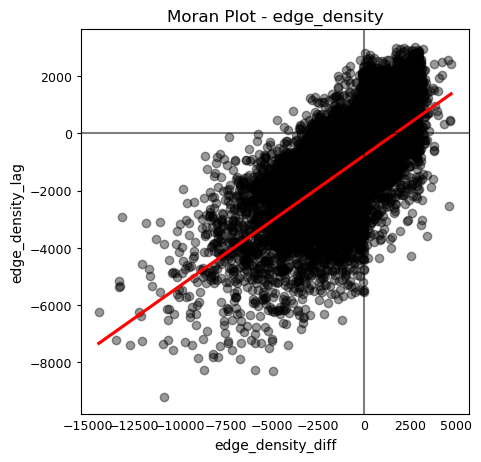

With significance 0.001, the Moran's I value for edge_density is 0.46


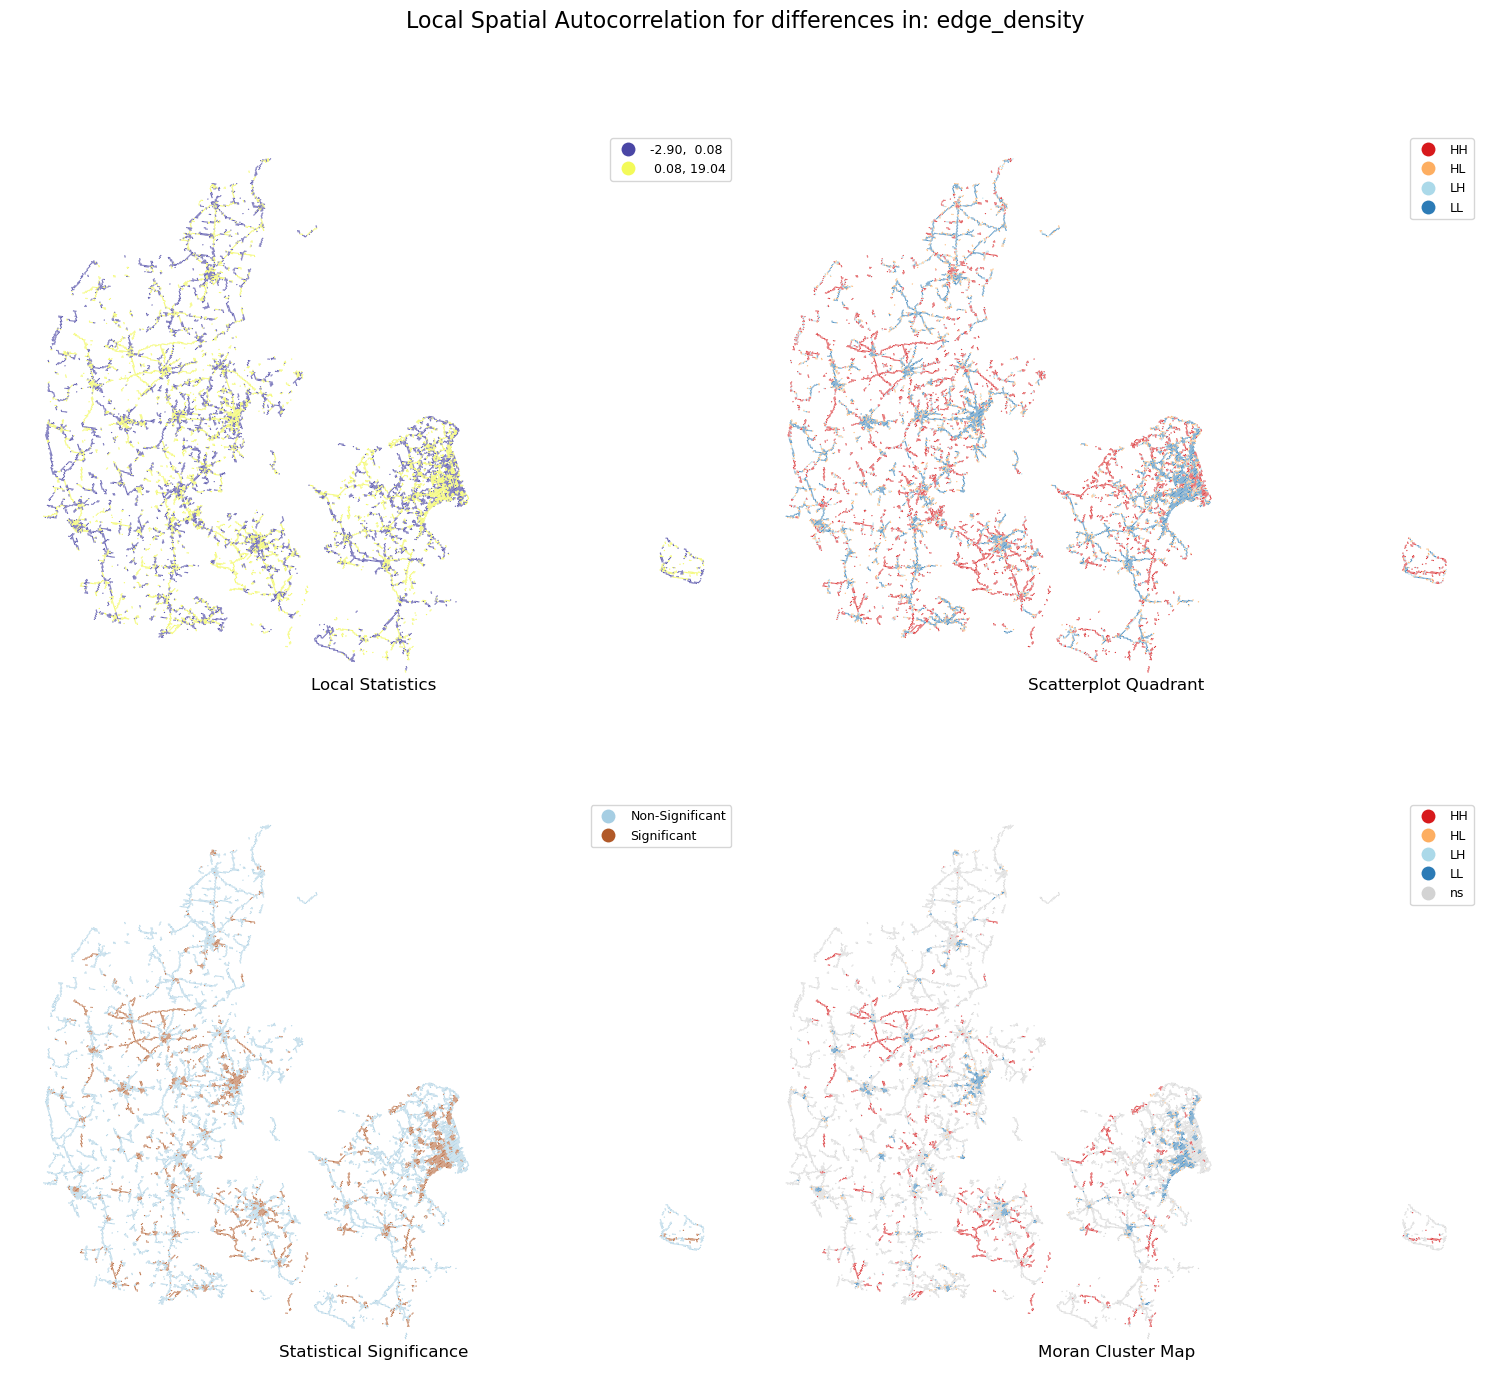

Using spatial weights k6, for 'edge_density', 1939 out of 16064 grid cells (12.07%) are part of a hotspot.
Using spatial weights k6, for 'edge_density', 1599 out of 16064 grid cells (9.95%) are part of a coldspot.




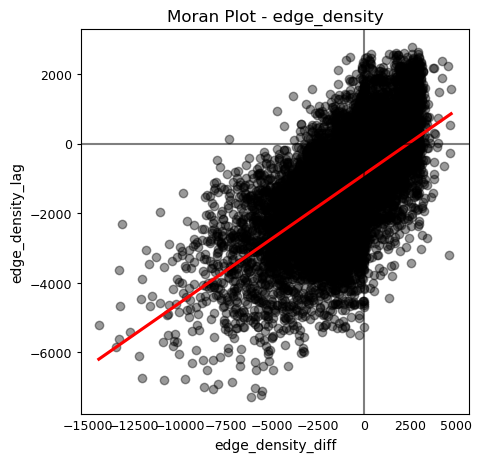

With significance 0.001, the Moran's I value for edge_density is 0.37


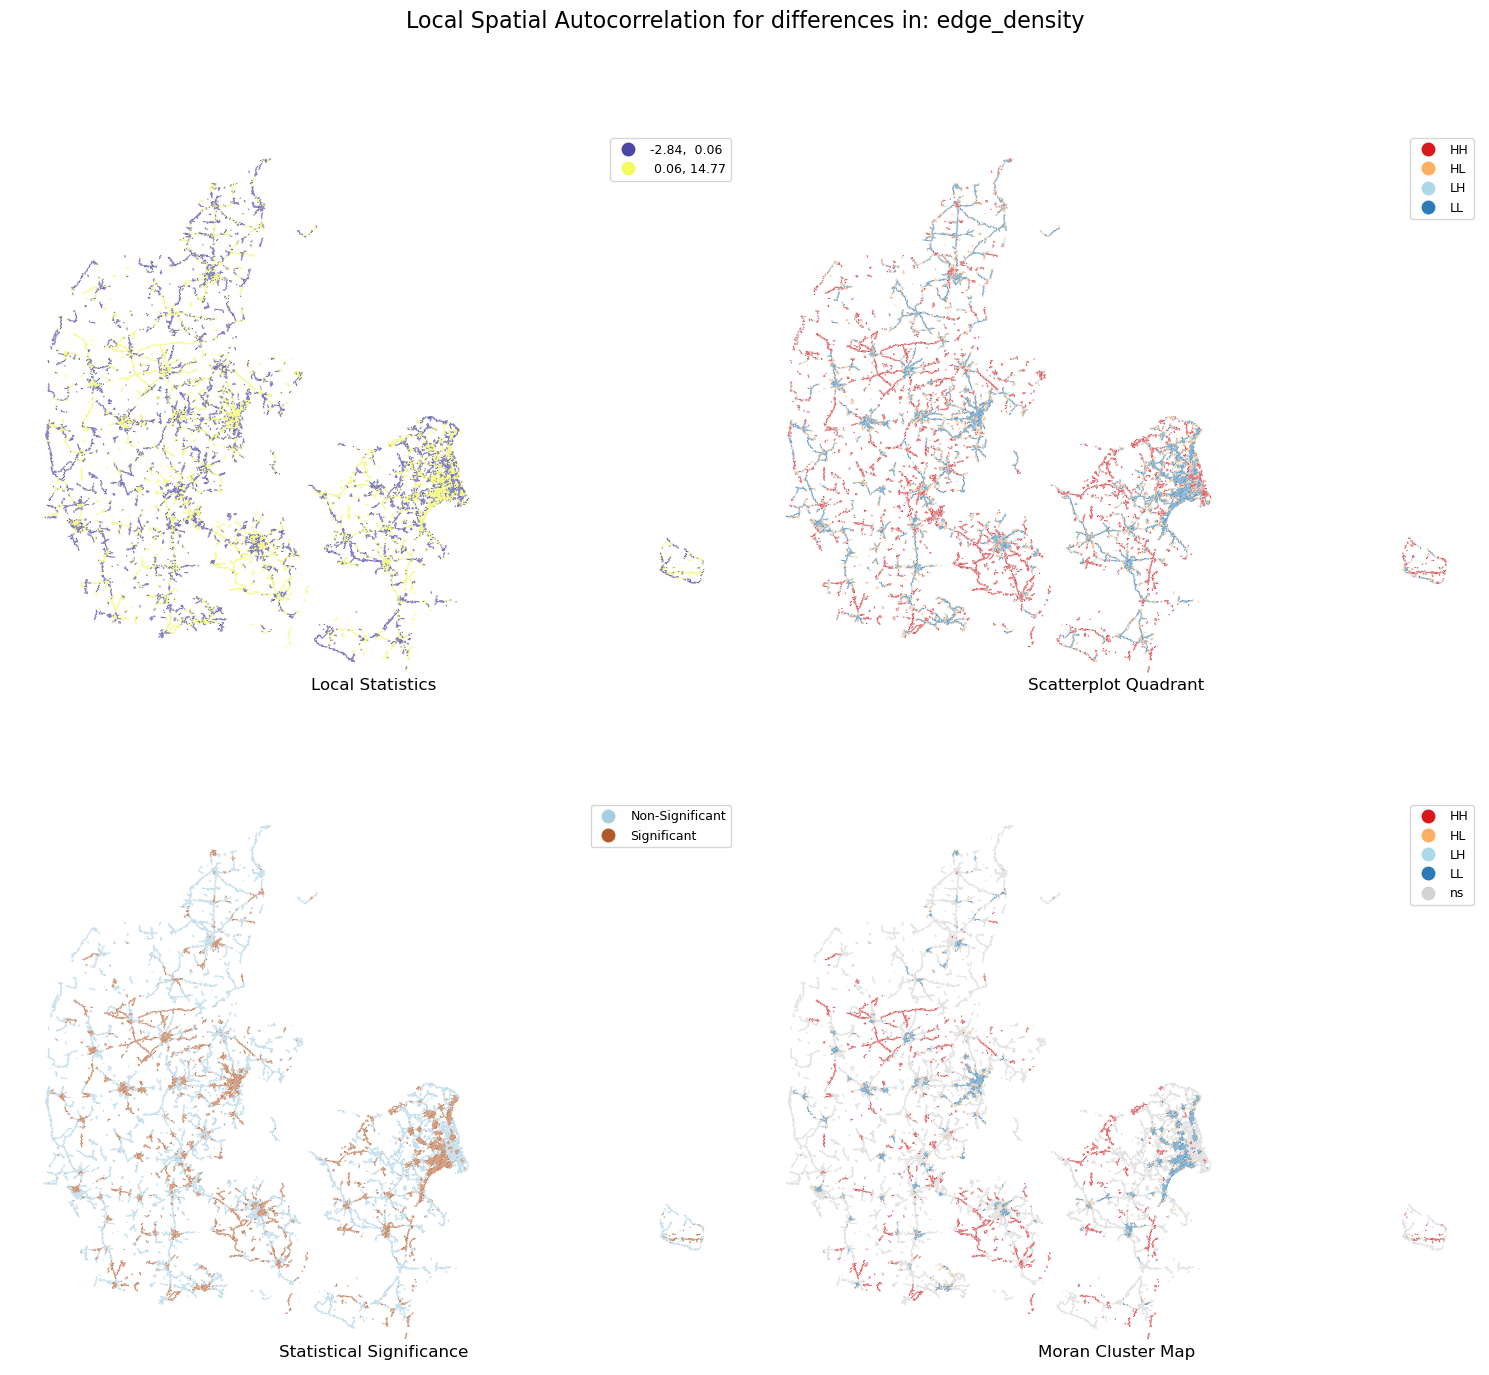

Using spatial weights k12, for 'edge_density', 2271 out of 16064 grid cells (14.14%) are part of a hotspot.
Using spatial weights k12, for 'edge_density', 2096 out of 16064 grid cells (13.05%) are part of a coldspot.




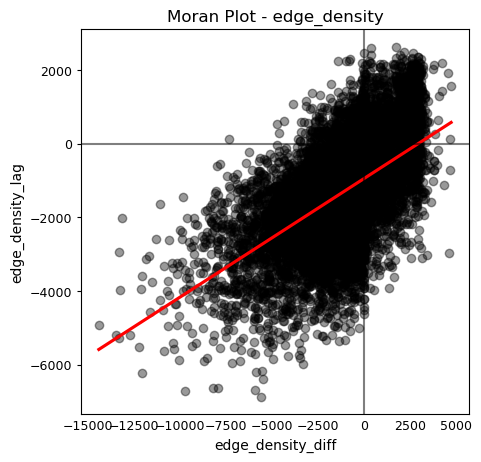

With significance 0.001, the Moran's I value for edge_density is 0.32


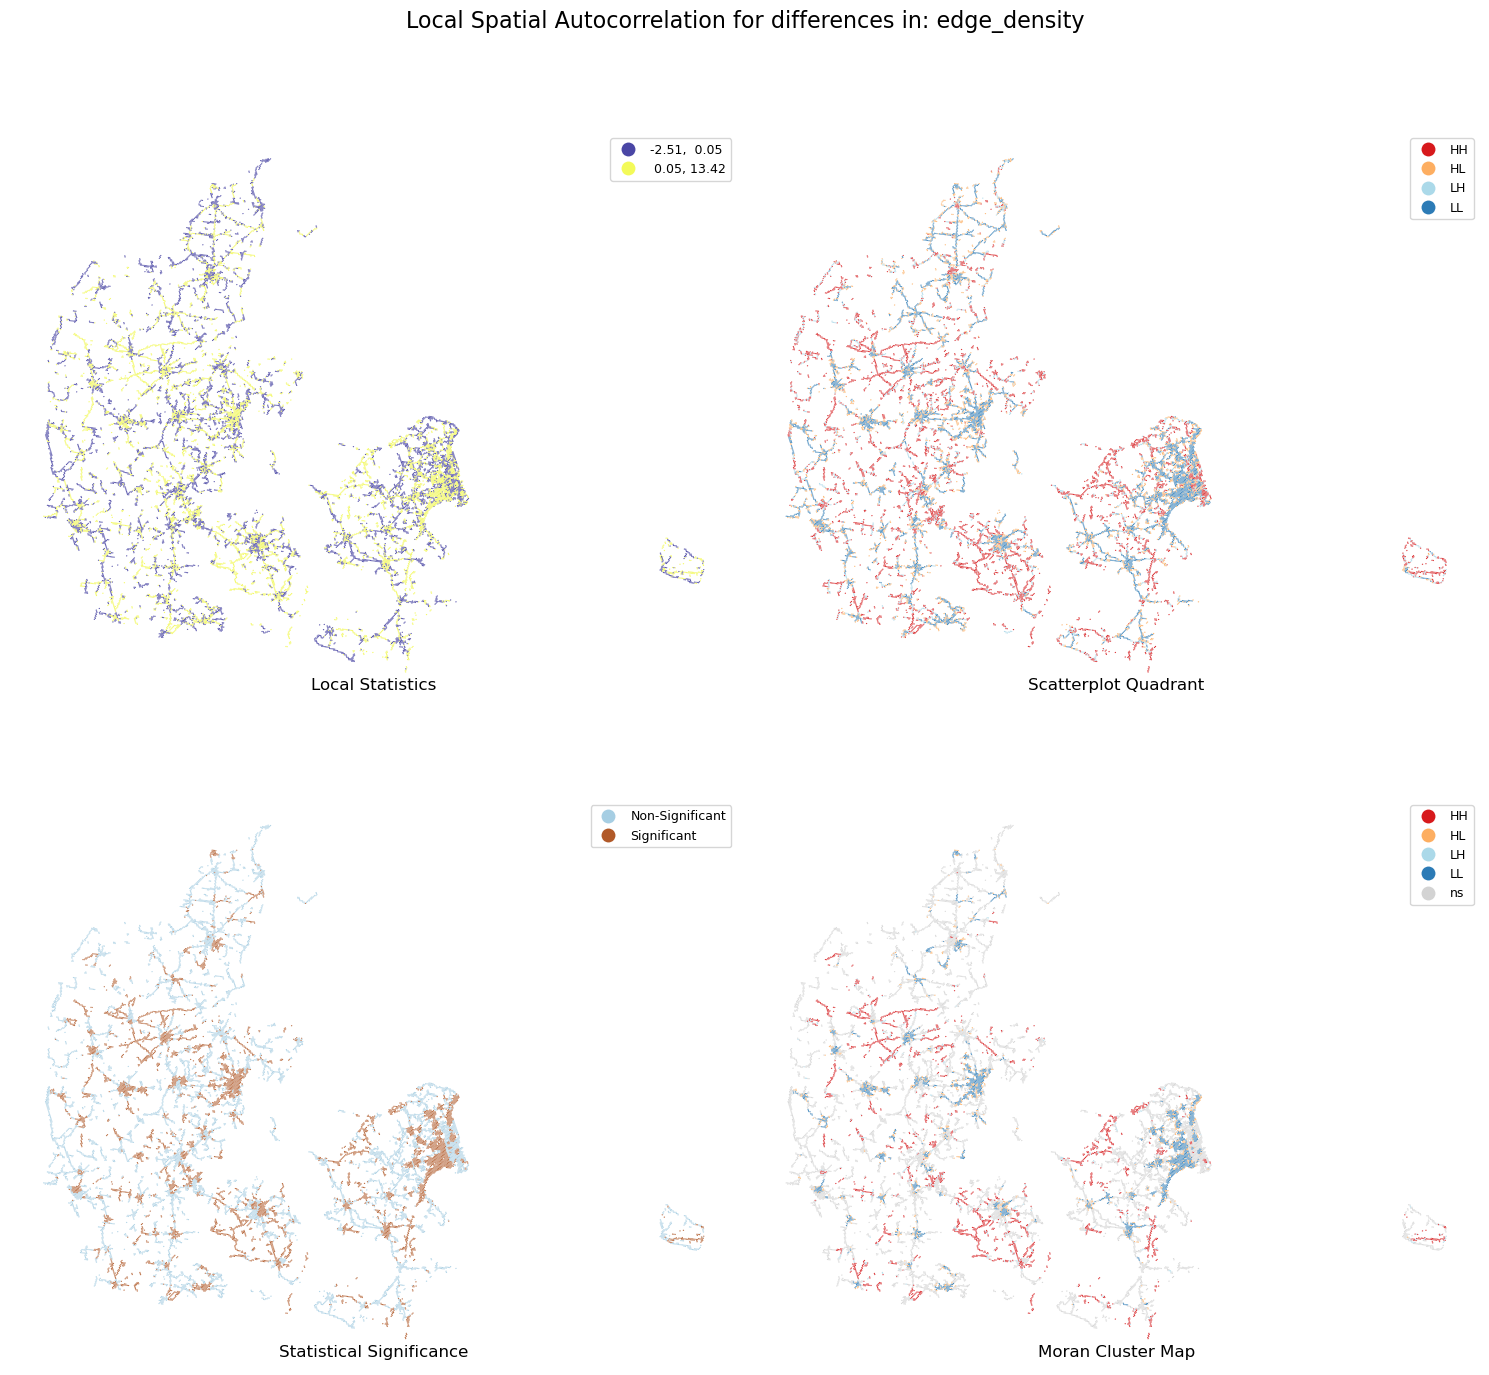

Using spatial weights k18, for 'edge_density', 2436 out of 16064 grid cells (15.16%) are part of a hotspot.
Using spatial weights k18, for 'edge_density', 2399 out of 16064 grid cells (14.93%) are part of a coldspot.




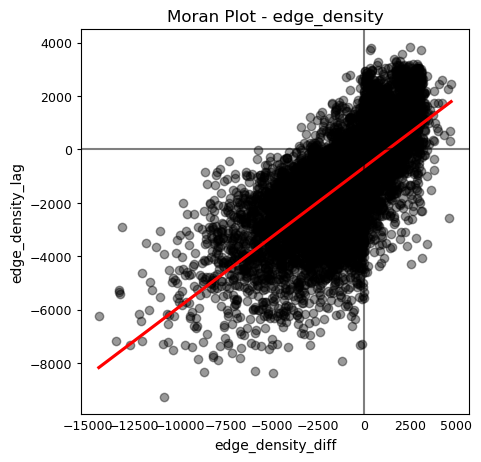

With significance 0.001, the Moran's I value for edge_density is 0.52


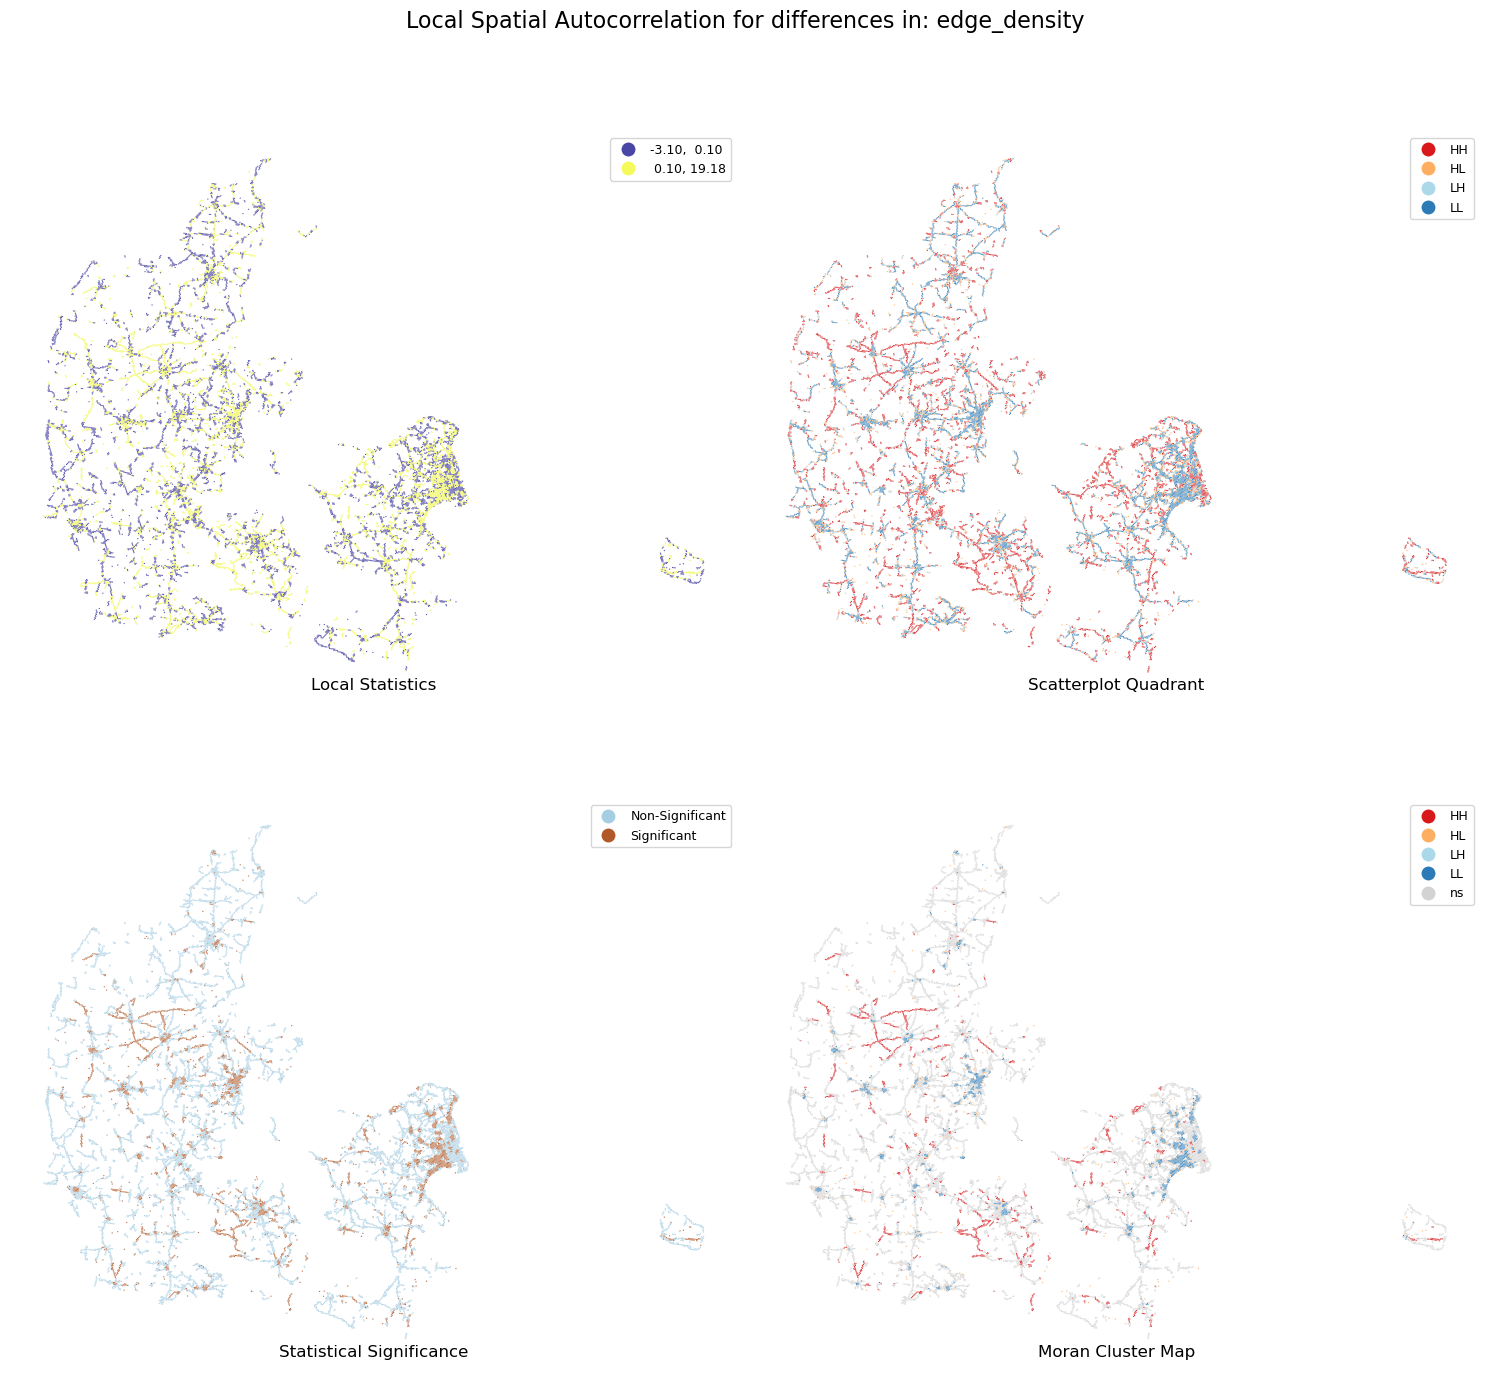

Using spatial weights dist1000, for 'edge_density', 1546 out of 16064 grid cells (9.62%) are part of a hotspot.
Using spatial weights dist1000, for 'edge_density', 1412 out of 16064 grid cells (8.79%) are part of a coldspot.




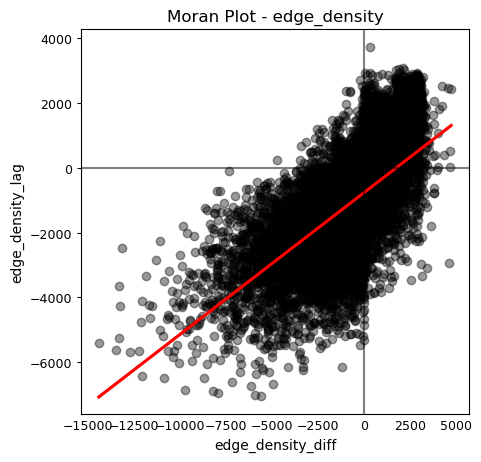

With significance 0.001, the Moran's I value for edge_density is 0.44


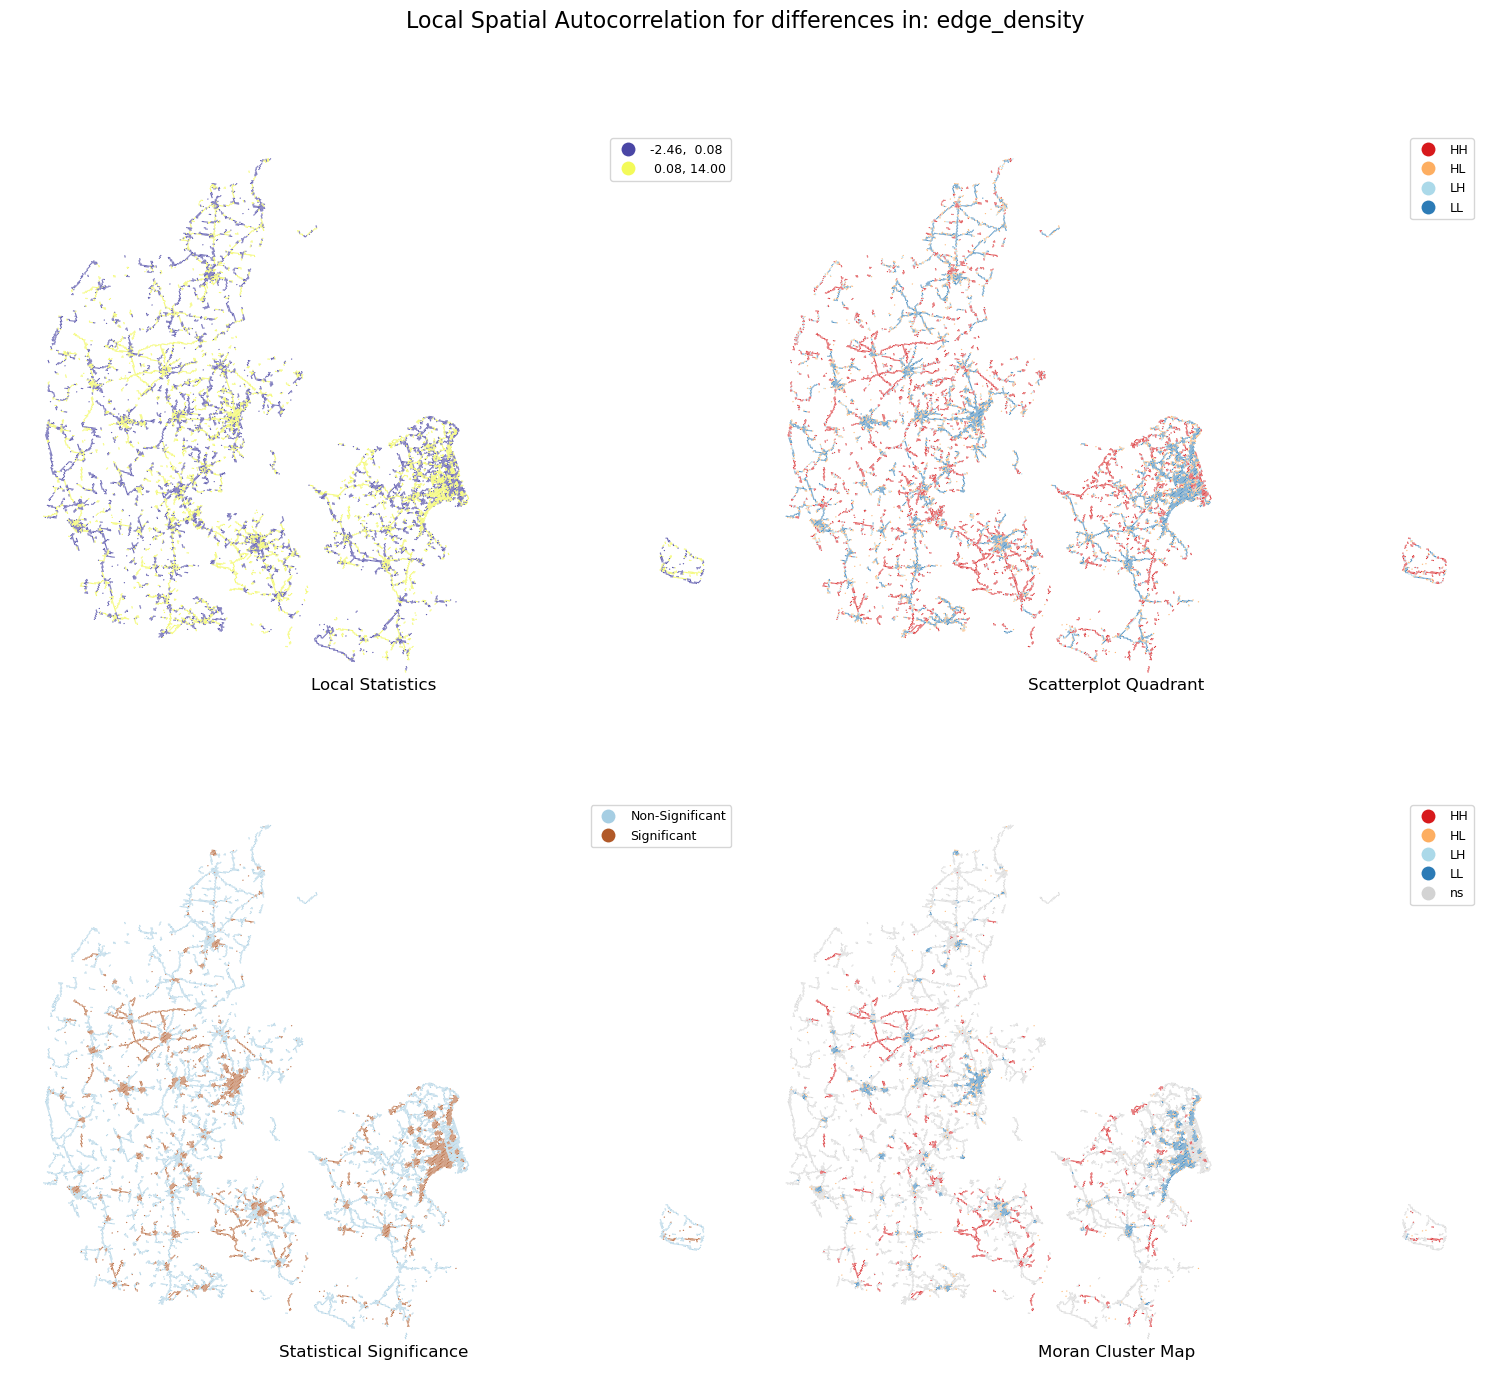

Using spatial weights dist2000, for 'edge_density', 1893 out of 16064 grid cells (11.78%) are part of a hotspot.
Using spatial weights dist2000, for 'edge_density', 1982 out of 16064 grid cells (12.34%) are part of a coldspot.




In [5]:
# dictionaries for results
all_morans = {}
all_lisas = {}
hotspot_count = {}
coldspot_count = {}

for name, w in all_weigths.items():
    morans_density = eval_func.compute_spatial_autocorrelation(
        col_names, variable_names, ex_grid_subset, w, filepaths
    )

    all_morans[name] = morans_density["edge_density"].I

    col_names = ["edge_density_diff"]
    variable_names = ["edge_density"]
    filepaths = [compare_analysis_plots_fp + f"lisa_edge_dens_{name}.png"]

    lisas_density = eval_func.compute_lisa(
        col_names, variable_names, ex_grid_subset, w, filepaths
    )

    all_lisas[name] = lisas_density["edge_density"]

    # Export
    q_cols = [v + "_q" for v in variable_names]
    q_cols.append("hex_id")
    ex_grid_subset.rename({"hex_id_osm": "hex_id"}, axis=1)[q_cols].to_csv(
        compare_analysis_data_fp + f"density_spatial_autocorrelation_{name}.csv",
        index=True,
    )

    for v in variable_names:
        hotspot = len(ex_grid_subset[ex_grid_subset[f"{v}_q"] == "HH"])
        coldspot = len(ex_grid_subset[ex_grid_subset[f"{v}_q"] == "LL"])

        print(
            f"Using spatial weights {name}, for '{v}', {hotspot} out of {len(ex_grid_subset)} grid cells ({hotspot/len(ex_grid_subset)*100:.2f}%) are part of a hotspot."
        )
        print(
            f"Using spatial weights {name}, for '{v}', {coldspot} out of {len(ex_grid_subset)} grid cells ({coldspot/len(ex_grid_subset)*100:.2f}%) are part of a coldspot."
        )
        print("\n")

        hotspot_count[name] = hotspot
        coldspot_count[name] = coldspot


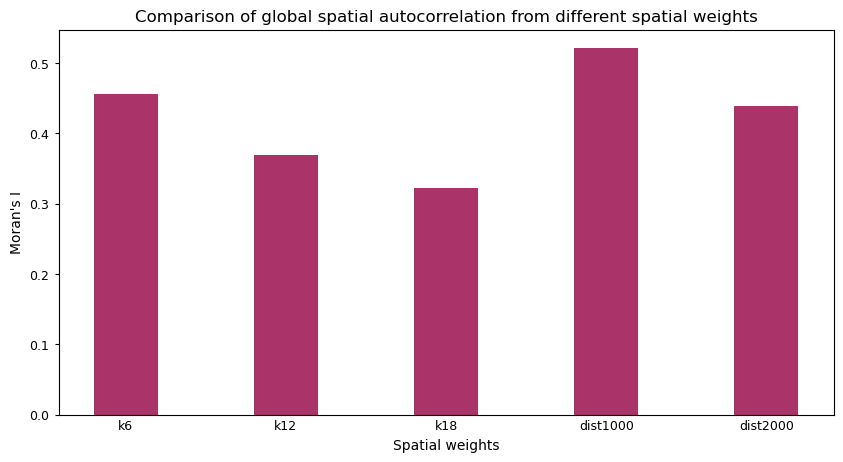

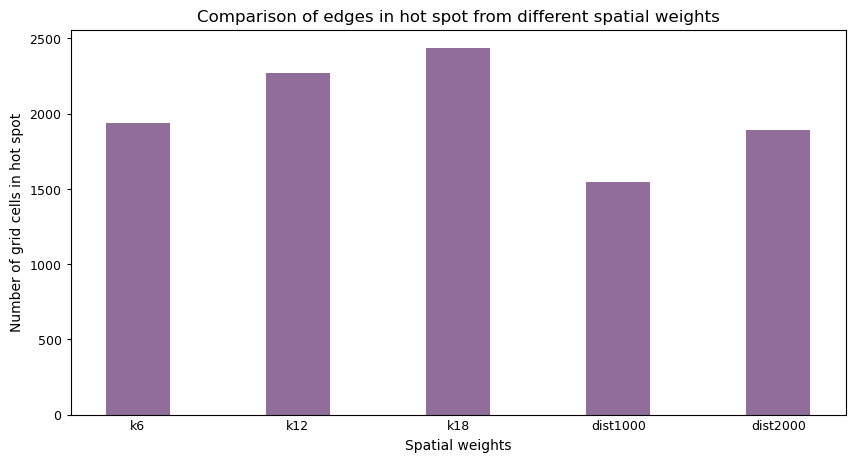

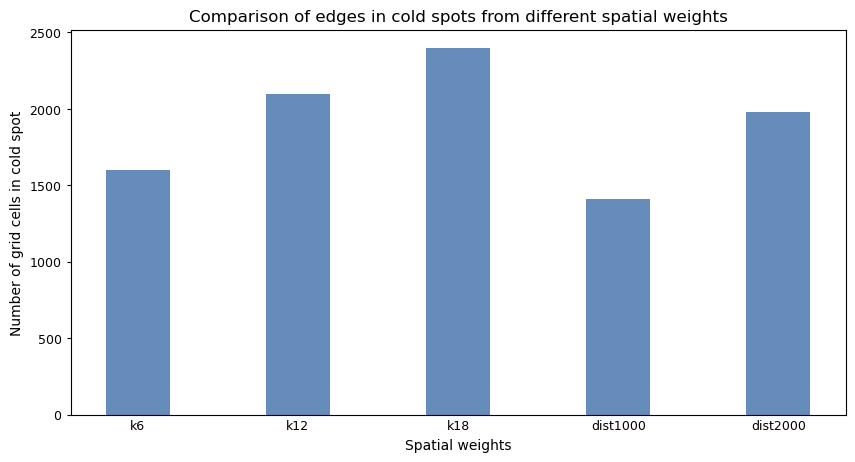

In [6]:
fig = plt.figure(figsize=(10, 5))

# creating the bar plot
plt.bar(all_morans.keys(), all_morans.values(), color="#AA336A", width=0.4)

plt.xlabel("Spatial weights")
plt.ylabel("Moran's I")
plt.title("Comparison of global spatial autocorrelation from different spatial weights")
plt.show()


fig = plt.figure(figsize=(10, 5))

# creating the bar plot
plt.bar(hotspot_count.keys(), hotspot_count.values(), color="#916E99", width=0.4)

plt.xlabel("Spatial weights")
plt.ylabel("Number of grid cells in hot spot")
plt.title("Comparison of edges in hot spot from different spatial weights")
plt.show()

fig = plt.figure(figsize=(10, 5))

# creating the bar plot
plt.bar(coldspot_count.keys(), coldspot_count.values(), color="#658CBB", width=0.4)

plt.xlabel("Spatial weights")
plt.ylabel("Number of grid cells in cold spot")
plt.title("Comparison of edges in cold spots from different spatial weights")
plt.show()


In [7]:
# read all local spatial autocorrelation results from CSV

df_k6 = pd.read_csv(
    compare_analysis_data_fp + f"density_spatial_autocorrelation_k6.csv",
    usecols=["edge_density_q", "hex_id"],
)
df_k6["name"] = "k6"

df_k10 = pd.read_csv(
    compare_analysis_data_fp + f"density_spatial_autocorrelation_k10.csv",
    usecols=["edge_density_q", "hex_id"],
)
df_k10["name"] = "k10"

df_k20 = pd.read_csv(
    compare_analysis_data_fp + f"density_spatial_autocorrelation_k20.csv",
    usecols=["edge_density_q", "hex_id"],
)
df_k20["name"] = "k20"

df_dist1 = pd.read_csv(
    compare_analysis_data_fp + f"density_spatial_autocorrelation_dist1000.csv",
    usecols=["edge_density_q", "hex_id"],
)
df_dist1["name"] = "dist1000"

df_dist2 = pd.read_csv(
    compare_analysis_data_fp + f"density_spatial_autocorrelation_dist2000.csv",
    usecols=["edge_density_q", "hex_id"],
)
df_dist2["name"] = "dist2000"

all_dfs = pd.concat([df_k6, df_k10, df_k20, df_dist1, df_dist2])

# group based on grid cell id

grouped = all_dfs.groupby("hex_id")

hex_classification_count = {}

# count unique quadrant classifications
for hex_id, group in grouped:
    hex_classification_count[hex_id] = len(group["edge_density_q"].unique())

count_reclassifications = [k for k, v in hex_classification_count.items() if v > 1]

print(
    f"{len(count_reclassifications)} out of {len(grouped)} grid cells change cluster type depending on the spatial weight definition used."
)


4981 out of 16064 grid cells change cluster type depending on the spatial weight definition used.
